In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers, datasets, optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [9]:
# separate data into train_images and test_images
(train_images, train_lables), (test_images, test_lables) = datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
len(test_images)

10000

In [11]:
len(train_images)

50000

In [12]:
# Normalize Pixel Values to improve model performance.
train_images, test_images = train_images /255.0, test_images /255.0

In [13]:
train_lables_one_hot = to_categorical(train_lables)
test_lables_one_hot = to_categorical(test_lables)

In [14]:
# Create the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(train_images, train_lables_one_hot, epochs=15,  validation_data=(test_images, test_lables_one_hot))

Epoch 1/15
1563/1563 [==============================] - 27s 12ms/step - loss: 1.7170 - accuracy: 0.4210 - val_loss: 1.2620 - val_accuracy: 0.5491
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1556 - accuracy: 0.5959 - val_loss: 1.0352 - val_accuracy: 0.6290
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9834 - accuracy: 0.6594 - val_loss: 0.8654 - val_accuracy: 0.7011
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8768 - accuracy: 0.6968 - val_loss: 0.8147 - val_accuracy: 0.7231
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7952 - accuracy: 0.7261 - val_loss: 0.8300 - val_accuracy: 0.7146
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7380 - accuracy: 0.7490 - val_loss: 0.7215 - val_accuracy: 0.7491
Epoch 7/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6804 - accuracy: 0.7669 - val_loss: 0.7627 -

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_lables_one_hot, verbose=2)

313/313 - 1s - loss: 0.6177 - accuracy: 0.7978 - 1s/epoch - 3ms/step


In [18]:
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 79.78%


In [19]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from google.colab import drive
import os

# Save the model to Google Drive

# Define the save directory in Google Drive
save_dir = '/content/drive/My Drive/models'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define the path where the model will be saved
model_path = os.path.join(save_dir, 'cifar10_cnn_model.h5')

# Save the entire model to the specified path
model.save(model_path)

# Print confirmation that the model was saved
print(f"Model saved to {model_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/models/cifar10_cnn_model.h5


In [21]:
# Import the load_model function from keras.models
from tensorflow.keras.models import load_model

# Load the model from the saved file
loaded_model = load_model(model_path)

# Print the summary of the loaded model
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                        

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [67]:
# Load the image from Google Drive
img_path = '/content/drive/MyDrive/images/truck.jpg'  # path to image that i want to knew what is inside it
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

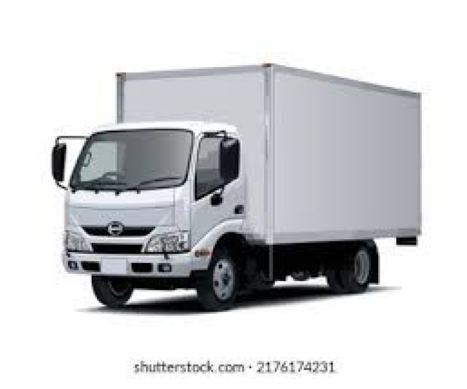

In [68]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img_ = mpimg.imread(img_path)
imgplot = plt.imshow(img_)
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [69]:
# Make a prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions[0])

1/1 [==============================] - 0s 18ms/step


In [70]:
# printing the image's class
print(f"The image is predicted to be a {class_names[predicted_class]}.")

The image is predicted to be a truck.
